## Data loading and Model Training/Tuning

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/heloc_dataset_v1.csv')
mask = (df.iloc[:, 1:] == -9).all(axis=1)
df = df[~mask]

In [4]:
X = df.drop('RiskPerformance', axis=1)  # Features
y = df['RiskPerformance']               # Target variable

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder and return encoded labels
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into train and test sets using the encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

### XGBoost

In [5]:
# Create an instance of the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions (for example, on the test set)
y_pred = model.predict(X_test)

# Check the accuracy of your model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


#### Gridsearch

In [6]:
# from sklearn.model_selection import GridSearchCV

# # Parameters grid to search
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.9, 1.0],
#     'colsample_bytree': [0.7, 0.9, 1.0]
# }

# # Initialize the XGBClassifier
# xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# # Setup the grid search
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# # Fit grid search
# best_model = grid_search.fit(X_train, y_train)

# # Print the best parameters and highest accuracy
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy found: ", best_model.best_score_)


#### Best parameters

In [7]:
# Create an instance of the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7)

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions (for example, on the test set)
y_pred = model.predict(X_test)

# Check the accuracy of your model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


#### Cross validation

In [8]:
# from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
# from numpy import mean, std

# #evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# print("done!")
# print("evaluating:")

# # report performance
# print(n_scores)
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

## EDA 

In [9]:
import pygwalker as pyg

In [10]:
# pyg.walk(df, dark='dark')

## Clustering

### K-Means

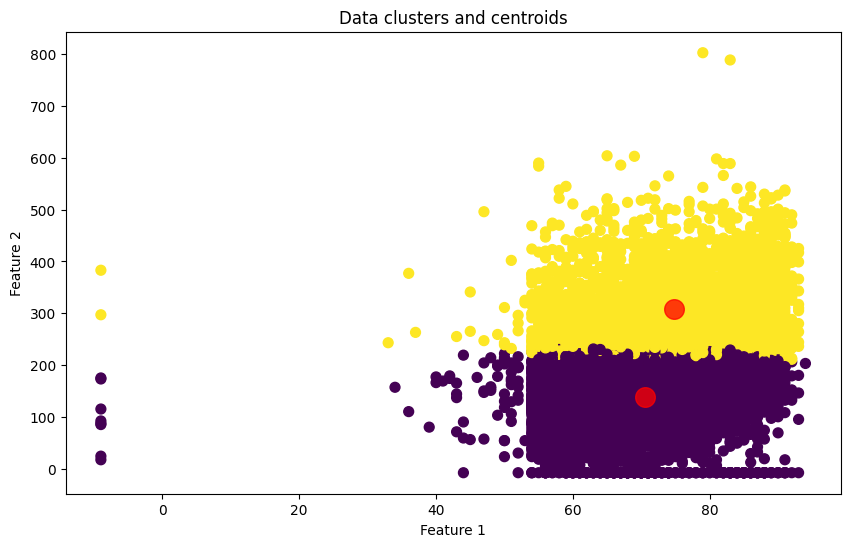

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'X' is your dataset (features)

# Number of clusters
k = 2  # You might need to experiment with different values of k

# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit model to data
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters (assuming the first two columns are meaningful for plotting)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Mark cluster centers
plt.title('Data clusters and centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### Elbow Method

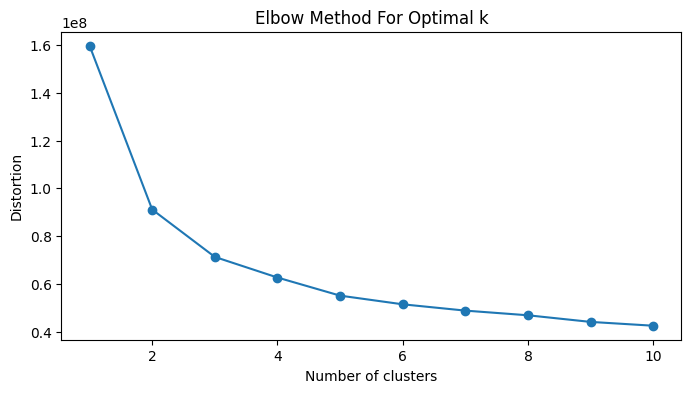

In [12]:
# Calculate distortions for a range of number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


#### PCA

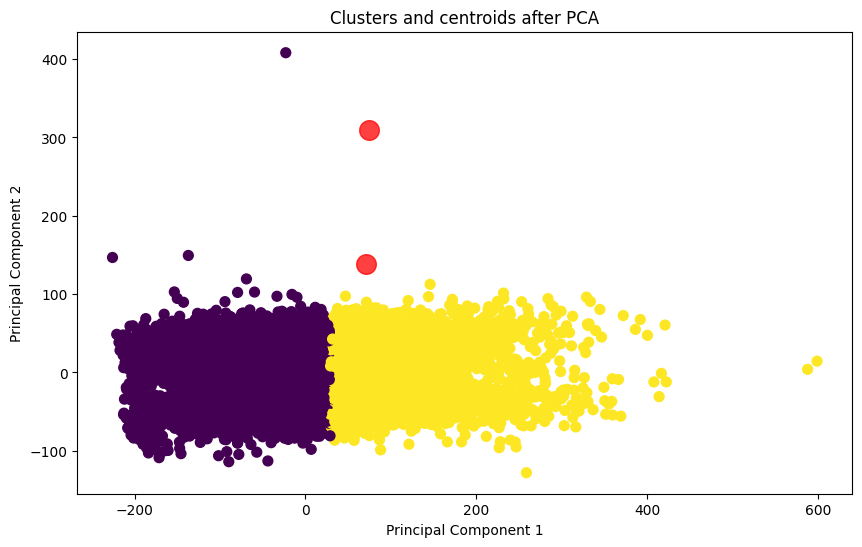

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' contains all features you want to include
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Apply PCA for dimensionality reduction to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clusters and centroids after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### DBSCAN (niet goed nog)

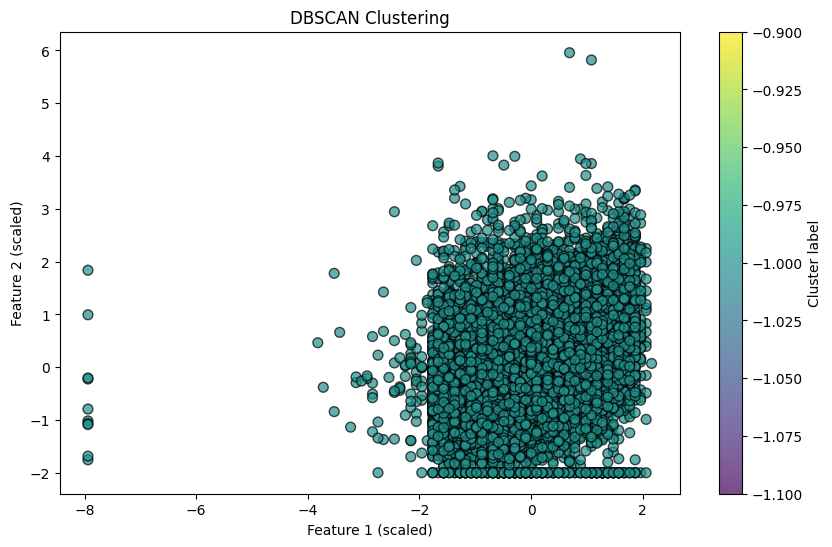

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'X' is your dataset (features)
# Standardize the features (important for distance-based algorithms like DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DBSCAN instance
# These parameters are starting points. You might need to adjust them based on your data.
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the scaled data
clusters = dbscan.fit_predict(X_scaled)

# Plot the clusters (assuming the first two features can be used for a meaningful 2D plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.7, edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster label')
plt.show()

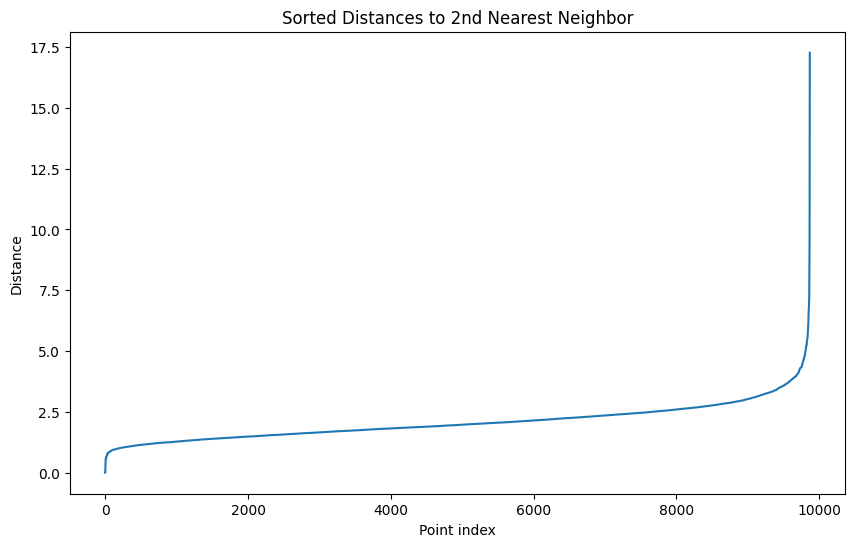

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use NearestNeighbors to find the distance to the nearest `min_samples` points
neigh = NearestNeighbors(n_neighbors=5)  # same as min_samples
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # The second closest neighbor

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Sorted Distances to 2nd Nearest Neighbor')
plt.xlabel('Point index')
plt.ylabel('Distance')
plt.show()

## Random Forest Model

In [16]:
#Based on tutorial: https://machinelearningmastery.com/random-forest-ensemble-in-python/
#Run this code before you can classify

# Use numpy to convert to arrays
import numpy as np
from numpy import mean, std

# Pandas is used for data manipulation
import pandas as pd

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

def buildModel(features, labelDimension) :
    # Labels are the values we want to predict
    labels = np.array(features[labelDimension])
    # Remove the labels from the features
    # axis 1 refers to the columns
    features= features.drop(labelDimension, axis = 1)

    # Convert to numpy array
    features = np.array(features)

    # Split the data into training and testing sets (heavily overfit on provided dataset to get as close as possible to the original model)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30)

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 1500)
    # Train the model on training data
    rf.fit(train_features, train_labels)

    #evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
    n_scores = cross_val_score(rf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    print("done!")
    print("evaluating:")

    # report performance
    print(n_scores)
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

    return rf

In [17]:
#the columns that stores the labels
labelDimension = "RiskPerformance"

#build a random forest classifier
model = buildModel(df, labelDimension)

Training Features Shape: (6909, 23)
Training Labels Shape: (6909,)
Testing Features Shape: (2962, 23)
Testing Labels Shape: (2962,)
done!
evaluating:
[0.72165992 0.73556231 0.72644377 0.75987842 0.73961499 0.73454914
 0.72847011 0.74670719 0.73454914 0.71428571]
Accuracy: 0.734 (0.012)


## Further Dimensionality Reduction

### LinearDiscriminantAnalysis

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = df.drop('RiskPerformance', axis=1)
y = df['RiskPerformance']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

lda = LDA()
lda.fit(X, y_encoded)
X_lda = lda.transform(X)

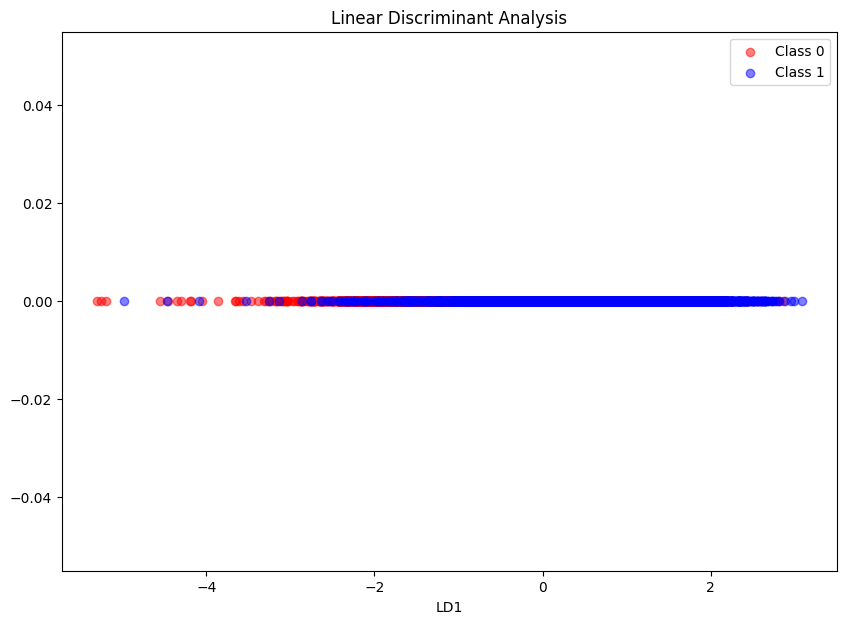

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X_lda[y=='Bad', 0], np.zeros((np.sum(y=='Bad'),)), color='red', alpha=0.5, label='Class 0')
plt.scatter(X_lda[y=='Good', 0], np.zeros((np.sum(y=='Good'),)), color='blue', alpha=0.5, label='Class 1')
plt.xlabel('LD1')
plt.legend()
plt.title('Linear Discriminant Analysis')
plt.show()

## Multi-Dimensional Scaling

In [20]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

In [21]:
# Assuming df is your dataframe and 'RiskPerformance' is the target
X = df.drop('RiskPerformance', axis=1)
y = df['RiskPerformance']
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# # Creating an MDS object
# mds = MDS(n_components=2, random_state=42)
# # Transform the data
# X_mds = mds.fit_transform(X_scaled)

In [25]:
# # Converting the target variable to numeric codes for coloring
# colors = y.astype('category').cat.codes

# # Plotting
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors, cmap='viridis', alpha=0.5)
# plt.title('MDS Reduction of Data')
# plt.xlabel('MDS Dimension 1')
# plt.ylabel('MDS Dimension 2')
# plt.colorbar(scatter, label='Risk Performance (encoded)')
# plt.show()

### 3D MDS

## Part-Linear Multidimensional Projection

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

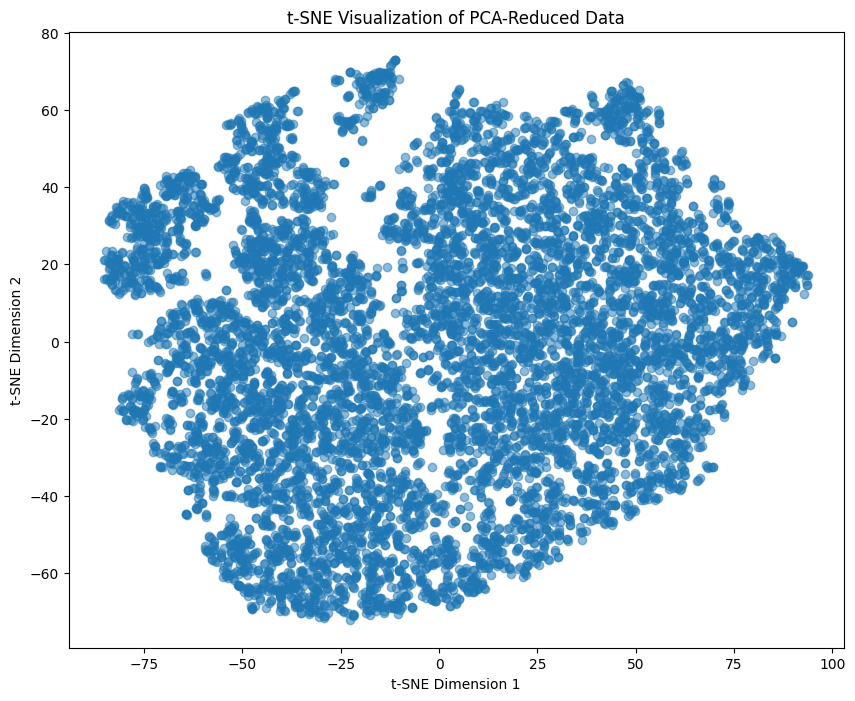

In [27]:
pca = PCA(n_components=10)  # For example, if 10 components cover > 95% variance
X_pca = pca.fit_transform(X_scaled)

# Applying t-SNE on PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plotting the t-SNE output
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of PCA-Reduced Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

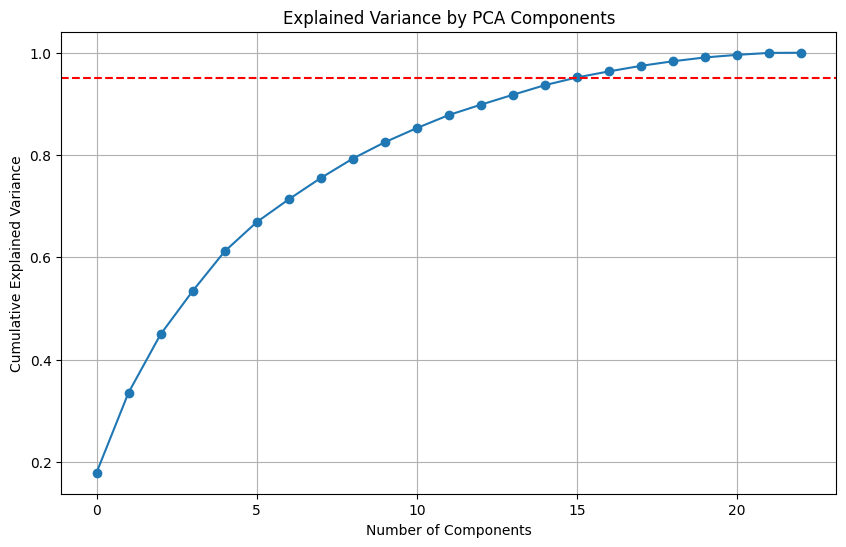

In [28]:
# Assuming X_scaled is your scaled feature set excluding the target variable
pca = PCA().fit(X_scaled)

# Plot the cumulative variance explained by the components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # Line at 95% variance
plt.show()

In [29]:
# Apply PCA
pca = PCA(n_components=15)  # Reduce to an intermediate dimension
X_pca = pca.fit_transform(X_scaled)
# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

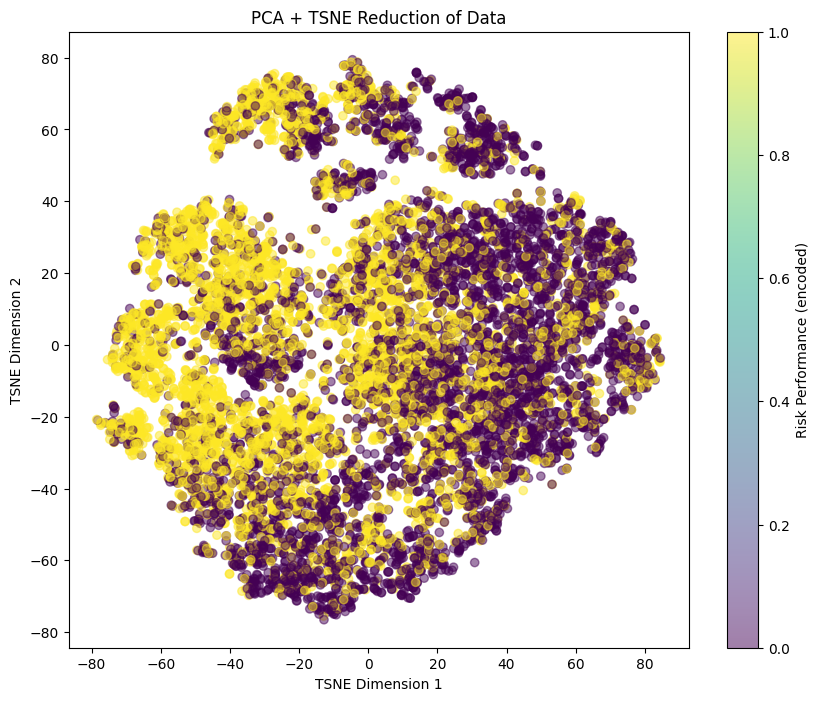

In [30]:
colors = y.astype('category').cat.codes
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap='viridis', alpha=0.5)
plt.title('PCA + TSNE Reduction of Data')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.colorbar(scatter, label='Risk Performance (encoded)')
plt.show()

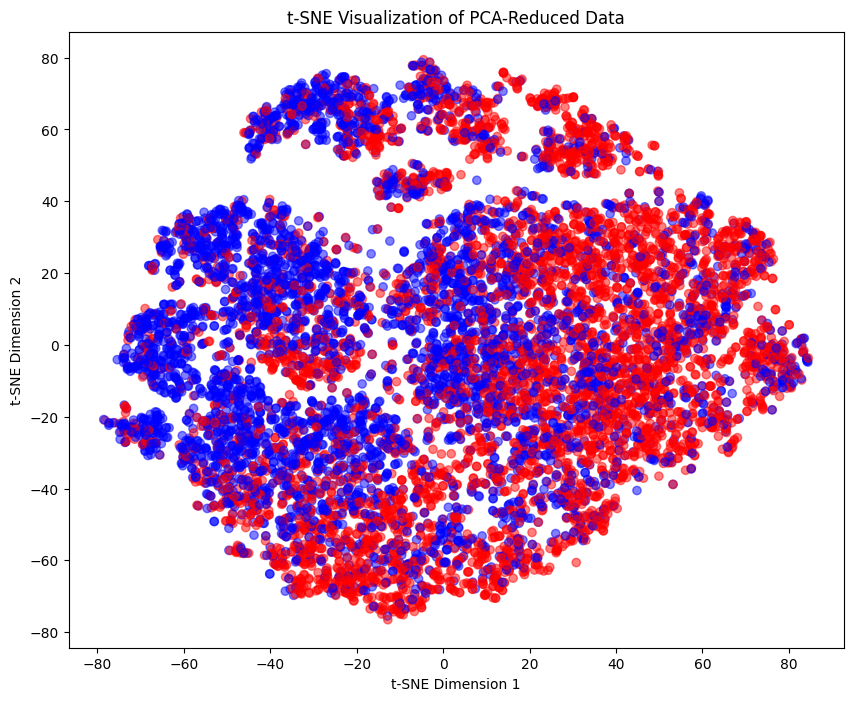

In [31]:
# Map 'Good' and 'Bad' to numeric values; alternatively, you can use LabelEncoder
y_labels = df['RiskPerformance'].map({'Good': 1, 'Bad': 0})
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Prepare data (excluding target variable for PCA)
X = df.drop('RiskPerformance', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA reduction
pca = PCA(n_components=15)  # Adjust the number of components based on previous analysis
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Map 'RiskPerformance' to colors
colors = df['RiskPerformance'].map({'Good': 'blue', 'Bad': 'red'})

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.5)
plt.title('t-SNE Visualization of PCA-Reduced Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## DGrid

In [32]:
import math
import numpy as np
import time
import numba

from sklearn.neighbors import KDTree
from typing import Literal

RETURN_TYPE = Literal['coord', 'index']


@numba.jit(nopython=True, parallel=False)
def _density_calculation(count_map, mask, mask_size, x_min, x_max, y_min, y_max, nr_columns, nr_rows):
    dummy_points_candidates = []

    for row in range(nr_rows):
        y_ = row * (y_max - y_min) / (nr_rows - 1) + y_min

        for column in range(nr_columns):
            if count_map[row][column] == 0:
                x_ = column * (x_max - x_min) / (nr_columns - 1) + x_min
                density = 0

                for i in range(mask_size):
                    for j in range(mask_size):
                        r = row - (int(mask_size / 2)) + j
                        c = column - (int(mask_size / 2)) + i

                        if (0 <= r < nr_rows) and (0 <= c < nr_columns):
                            density += mask[i][j] * count_map[r][c]

                dummy_points_candidates.append([x_, y_, density, -1])

    return dummy_points_candidates


class DGrid:

    def __init__(self,
                 glyph_width: float = 1,
                 glyph_height: float = 1,
                 delta: float = None,
                 return_type: RETURN_TYPE = 'coord',
                 callbacks=[]
                 ):
        self.glyph_width_ = glyph_width
        self.glyph_height_ = glyph_height
        self.delta_ = delta
        self.return_type = return_type

        if self.delta_ is None:
            self.delta_ = 1

        self.grid_ = []
        self.callbacks = callbacks

    def _trigger_callbacks(self, msg):
        if self.callbacks is not None:
            for callback in self.callbacks:
                callback(msg)

    def _fit(self, y):
        self._trigger_callbacks("start fit")

        # calculating the bounding box
        max_coordinates = np.amax(y, axis=0)
        min_coordinates = np.amin(y, axis=0)
        bounding_box_width = max_coordinates[0] - min_coordinates[0]
        bounding_box_height = max_coordinates[1] - min_coordinates[1]

        # defining the number of rows and columns
        nr_columns = math.ceil((math.sqrt(self.delta_) * bounding_box_width) / self.glyph_width_)
        nr_rows = math.ceil((math.sqrt(self.delta_) * bounding_box_height) / self.glyph_height_)

        # if the number of rows and columns are not enough to fit all data instances, increase delta
        if nr_rows * nr_columns < len(y):
            nr_columns = (bounding_box_width / self.glyph_width_)
            nr_rows = (bounding_box_height / self.glyph_height_)
            self.delta_ = len(y) / (nr_rows * nr_columns)
            nr_columns = math.ceil(math.sqrt(self.delta_) * nr_columns)
            nr_rows = math.ceil(math.sqrt(self.delta_) * nr_rows)

            print("There is not enough space to remove overlaps! Setting delta to {0}, the smallest possible number "
                  "to fully remove overlaps. Increase it if more empty space is required.".format(self.delta_))

        # add the original points
        def to_grid_cell(id_, x_, y_):
            return {'id': id_,
                    'x': x_,
                    'y': y_,
                    'i': 0,
                    'j': 0,
                    'dummy': False}

        self._trigger_callbacks("refactor data")
        for i in range(len(y)):
            self.grid_.append(to_grid_cell(i, y[i][0], y[i][1]))

        # add the dummy points
        start_time = time.time()
        self._add_dummy_points(min_coordinates[0], max_coordinates[0],
                               min_coordinates[1], max_coordinates[1],
                               nr_columns, nr_rows)
        print("--- Add dummy points executed in %s seconds ---" % (time.time() - start_time))

        # execute
        self._trigger_callbacks("grid_rect")
        start_time = time.time()
        self.grid_ = DGrid._grid_rec(self.grid_, nr_rows, nr_columns, 0, 0)
        self.grid_.sort(key=lambda v: v.get('id'))
        print("--- Grid assignment executed in %s seconds ---" % (time.time() - start_time))

        self._trigger_callbacks("end grid_rect")

        # returning the overlap free scatterplot (or indexes)
        transformed = []

        # returning coordinates inside the bounding box of the original scatterplot
        min_coords_x = min_coordinates[0]
        min_coords_y = min_coordinates[1]
        glyph_width = self.glyph_width_
        glyph_height = self.glyph_height_

        # return grid indexes
        if self.return_type == 'index':
            min_coords_x = 0
            min_coords_y = 0
            glyph_width = 1
            glyph_height = 1

        for i in range(len(self.grid_)):
            if self.grid_[i]['dummy'] is False:
                transformed.append(np.array([min_coords_x + self.grid_[i]['j'] * glyph_width,
                                             min_coords_y + self.grid_[i]['i'] * glyph_height]))

        self._trigger_callbacks("finish")
        return np.array(transformed)

    def fit_transform(self, y):
        return self._fit(y)

    def fit(self, y):
        return self._fit(y)

    @staticmethod
    def _split_grid(grid, cut_point, direction):
        if direction == 'x':
            grid.sort(key=lambda cel: (cel['x'], cel['y']))
        else:
            grid.sort(key=lambda cel: (cel['y'], cel['x']))

        grid0 = grid[:cut_point]
        grid1 = []
        if cut_point < len(grid):
            grid1 = grid[-(len(grid) - cut_point):]

        return grid0, grid1

    @staticmethod
    def _grid_rec(grid, r, s, i, j):
        size = len(grid)

        if size > 0:
            if size == 1:
                grid[0]['i'] = i
                grid[0]['j'] = j
            else:
                if r > s:
                    half_rows = int(math.ceil(r / 2.0))
                    grid0, grid1 = DGrid._split_grid(grid, min(size, half_rows * s), 'y')
                    DGrid._grid_rec(grid0, half_rows, s, i, j)
                    DGrid._grid_rec(grid1, (r - half_rows), s, (i + half_rows), j)
                else:
                    half_columns = int(math.ceil(s / 2.0))
                    grid0, grid1 = DGrid._split_grid(grid, min(size, half_columns * r), 'x')
                    DGrid._grid_rec(grid0, r, half_columns, i, j)
                    DGrid._grid_rec(grid1, r, (s - half_columns), i, (j + half_columns))

        return grid

    def _add_dummy_points(self, x_min, x_max, y_min, y_max, nr_columns, nr_rows):
        self._trigger_callbacks("add dummy points")
        size = len(self.grid_)

        # counting the number of points per grid cell
        count_map = np.zeros((nr_rows, nr_columns), dtype=np.uint32)

        for i in range(size):
            col = math.ceil(((self.grid_[i]['x'] - x_min) / (x_max - x_min)) * (nr_columns - 1))
            row = math.ceil(((self.grid_[i]['y'] - y_min) / (y_max - y_min)) * (nr_rows - 1))
            count_map[row][col] = count_map[row][col] + 1

        # calculating the gaussian mask
        mask_size = int(max(3, ((x_max - x_min) * (y_max - y_min)) / (size * self.glyph_width_ * self.glyph_height_)))
        mask_size = mask_size + 1 if mask_size % 2 == 0 else mask_size
        mask = DGrid._gaussian_mask(mask_size, (mask_size - 1) / 6.0)

        self._trigger_callbacks("big ass nested for-loops")
        # creating all dummy candidates
        dummy_points_candidates = _density_calculation(count_map, mask, mask_size,
                                                       x_min, x_max, y_min, y_max,
                                                       nr_columns, nr_rows)

        self._trigger_callbacks("end of nested for-loops")
        # sorting candidates using density
        dummy_points_candidates.sort(key=lambda x: x[2])

        # defining the number of required dummy points
        nr_dummy_points = min((nr_rows * nr_columns) - size, len(dummy_points_candidates))

        # checking if density is not enough to decide the correct dummy points
        if len(dummy_points_candidates) > nr_dummy_points and math.fabs(
                dummy_points_candidates[nr_dummy_points - 1][2] -
                dummy_points_candidates[nr_dummy_points][2]) < 0.0001:

            # if not, create a kd-tree to find the nearest point in the original layout
            original_points = []
            for i in range(size):
                # adding the original points
                x_ = self.grid_[i]['x']
                y_ = self.grid_[i]['y']
                original_points.append([x_, y_])

            tree = KDTree(original_points, leaf_size=2)

            # add the distance information for the "undecided" dummy points
            for i in range(len(dummy_points_candidates)):
                if math.fabs(dummy_points_candidates[nr_dummy_points - 1][2] -
                             dummy_points_candidates[i][2]) < 0.0001:
                    dummy_points_candidates[i][3] = float(tree.query([[dummy_points_candidates[i][0],
                                                                       dummy_points_candidates[i][1]]], 1)[0])

            # sort the candidates again using density and distance
            dummy_points_candidates.sort(key=lambda x: (x[2], x[3]))

        for i in range(nr_dummy_points):
            self.grid_.append({'id': size + i,
                               'x': dummy_points_candidates[i][0],
                               'y': dummy_points_candidates[i][1],
                               'i': 0,
                               'j': 0,
                               'dummy': True})

        self._trigger_callbacks("end of dummy points")
        return

    @staticmethod
    def _gaussian_mask(size, sigma):
        mask = np.zeros((size, size), dtype=np.float32)

        for i in range(size):
            y = int(i - int(size / 2))

            for j in range(size):
                x = int(j - int(size / 2))
                mask[i][j] = 1.0 / (2 * math.pi * sigma * sigma) * math.exp(-(x * x + y * y) / (2 * sigma * sigma))

        return mask

In [33]:
import math
import numpy as np

import matplotlib
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def draw_starglyph(x, y, size, data, axes, facecolor, alpha):
    nr_points = len(data)
    increments = 360.0 / nr_points

    path_data = [(mpath.Path.MOVETO, (x + ((size / 2) * math.cos(math.radians(0))) * data[0],
                                      y + ((size / 2) * math.sin(math.radians(0))) * data[0]
                                      ))]

    for i in range(1, nr_points):
        x_ = x + ((size / 2) * math.cos(math.radians((i * increments)))) * data[i]
        y_ = y + ((size / 2) * math.sin(math.radians((i * increments)))) * data[i]
        path_data.append((mpath.Path.LINETO, (x_, y_)))

    path_data.append((mpath.Path.CLOSEPOLY, (x + ((size / 2) * math.cos(math.radians(0))) * data[0],
                                             y + ((size / 2) * math.sin(math.radians(0))) * data[0]
                                             )))

    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    patch = mpatches.PathPatch(path, facecolor=facecolor, linewidth=0.5, edgecolor='black', alpha=alpha)

    axes.add_patch(patch)

    ###############

    Path = mpath.Path
    path_data = []

    for i in range(nr_points):
        path_data.append((Path.MOVETO, (x, y)))
        x_ = x + (size / 2) * math.cos(math.radians((i * increments)))
        y_ = y + (size / 2) * math.sin(math.radians((i * increments)))
        path_data.append((Path.LINETO, (x_, y_)))
    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    patch = mpatches.PathPatch(path, linewidth=0.35, edgecolor='black', linestyle=':', alpha=0.5)

    axes.add_patch(patch)


def starglyphs(projection, dataset, glyph_width, glyph_height, label, names=None,
               cmap='Dark2', alpha=1.0, figsize=(5, 5), fontsize=6):
    max_glyph_size = max(glyph_width, glyph_height)
    max_coordinates = np.amax(projection, axis=0)
    min_coordinates = np.amin(projection, axis=0)

    min_label = label.min()
    max_label = label.max()

    # divide every column by its maximum
    max_X = np.amax(dataset, axis=0)
    min_X = np.amin(dataset, axis=0)
    for i in range(len(dataset)):
        for j in (range(len(max_X))):
            dataset[i][j] = (dataset[i][j] - min_X[j]) / (max_X[j] - min_X[j])

    norm = matplotlib.colors.Normalize(vmin=min_label, vmax=max_label)
    color_map = matplotlib.cm.get_cmap(cmap)

    figure, axes = plt.subplots(figsize=figsize)
    plt.axis([min_coordinates[0] - max_glyph_size,
              max_coordinates[0] + max_glyph_size,
              min_coordinates[1] - max_glyph_size,
              max_coordinates[1] + max_glyph_size])

    for i in range(len(projection)):
        x_ = projection[i][0]
        y_ = projection[i][1]
        label_ = label[i]
        glyph_size_ = max_glyph_size
        draw_starglyph(x_, y_, glyph_size_, dataset[i], axes, alpha=alpha, facecolor=color_map(norm(label_)))
        if names is not None:
            plt.text(x_, (y_ + glyph_size_ / 2), names[i], horizontalalignment='center', fontsize=fontsize)

    axes.set_aspect(1)


def circles(projection, glyph_width, glyph_height, label,
            cmap='Dark2', alpha=1.0, figsize=(5, 5), linewidth=0.5, edgecolor='white'):
    max_glyph_size = max(glyph_width, glyph_height)
    max_coordinates = np.amax(projection, axis=0)
    min_coordinates = np.amin(projection, axis=0)

    min_label = label.min()
    max_label = label.max()

    norm = matplotlib.colors.Normalize(vmin=min_label, vmax=max_label)
    color_map = matplotlib.cm.get_cmap(cmap)

    figure, axes = plt.subplots(figsize=figsize)
    plt.axis([min_coordinates[0] - max_glyph_size,
              max_coordinates[0] + max_glyph_size,
              min_coordinates[1] - max_glyph_size,
              max_coordinates[1] + max_glyph_size])

    for i in range(len(projection)):
        x_ = projection[i][0]
        y_ = projection[i][1]
        label_ = label[i]
        glyph_size_ = max_glyph_size

        circle = plt.Circle((x_, y_), (glyph_size_ / 2),
                            linewidth=linewidth,
                            edgecolor=edgecolor,
                            alpha=alpha,
                            facecolor=color_map(norm(label_)))
        axes.add_artist(circle)

    axes.set_aspect(1)


def rectangles(projection, glyph_width, glyph_height, label,
               cmap='Dark2', alpha=1.0, figsize=(5, 5), linewidth=0.5, edgecolor='white'):
    max_glyph_size = max(glyph_width, glyph_height)
    max_coordinates = np.amax(projection, axis=0)
    min_coordinates = np.amin(projection, axis=0)

    min_label = label.min()
    max_label = label.max()

    norm = matplotlib.colors.Normalize(vmin=min_label, vmax=max_label)
    color_map = matplotlib.cm.get_cmap(cmap)

    figure, axes = plt.subplots(figsize=figsize)
    plt.axis([min_coordinates[0] - max_glyph_size,
              max_coordinates[0] + max_glyph_size,
              min_coordinates[1] - max_glyph_size,
              max_coordinates[1] + max_glyph_size])

    for i in range(len(projection)):
        x_ = projection[i][0]
        y_ = projection[i][1]
        label_ = label[i]
        glyph_size_ = max_glyph_size

        rect = plt.Rectangle((x_, y_), glyph_size_, glyph_size_,
                             linewidth=linewidth,
                             edgecolor=edgecolor,
                             alpha=alpha,
                             facecolor=color_map(norm(label_)))
        axes.add_artist(rect)

    axes.set_aspect(1)

def title(text):
    plt.title(text)


def savefig(filename, dpi):
    plt.savefig(filename, dpi=dpi)


def show():
    plt.show()

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df['RiskPerformance'].values)

In [44]:
dgrid = DGrid(glyph_width=0.5, glyph_height=0.5, delta=20.0)  # Adjust glyph size and delta as necessary
transformed_data = dgrid.fit_transform(X_pca)

--- Add dummy points executed in 3.043332815170288 seconds ---
--- Grid assignment executed in 0.4716641902923584 seconds ---


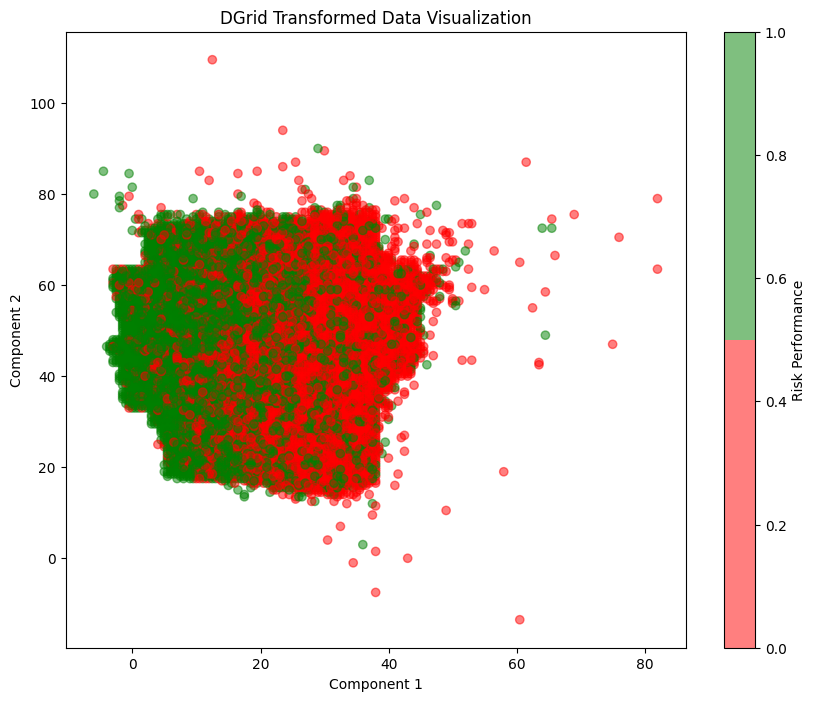

In [45]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])  # Red for 'Bad', Green for 'Good'

# Function to plot circles as an example
def plot_circles(data, labels):
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, alpha=0.5)
    plt.colorbar(scatter, label='Risk Performance')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('DGrid Transformed Data Visualization')
    plt.show()

plot_circles(transformed_data, encoded_labels)

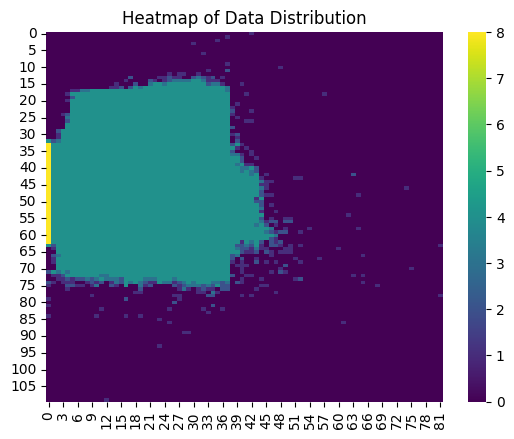

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap_data(data, labels):
    # Assume grid size based on the maximum coordinate values in transformed data
    max_x = max([int(point[0]) for point in data])
    max_y = max([int(point[1]) for point in data])
    grid_size_x = max_x + 1
    grid_size_y = max_y + 1

    heatmap_matrix = np.zeros((grid_size_y, grid_size_x))

    for point, label in zip(data, labels):
        x, y = int(point[0]), int(point[1])
        if 0 <= x < grid_size_x and 0 <= y < grid_size_y:
            heatmap_matrix[y, x] += 1  # Increment for count, or use label for specific values

    return heatmap_matrix

# Assuming 'transformed_data' contains the (x, y) coordinates scaled appropriately
heatmap_data = create_heatmap_data(transformed_data, encoded_labels)
sns.heatmap(heatmap_data, cmap='viridis')
plt.title("Heatmap of Data Distribution")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (24,) and (3, 23)

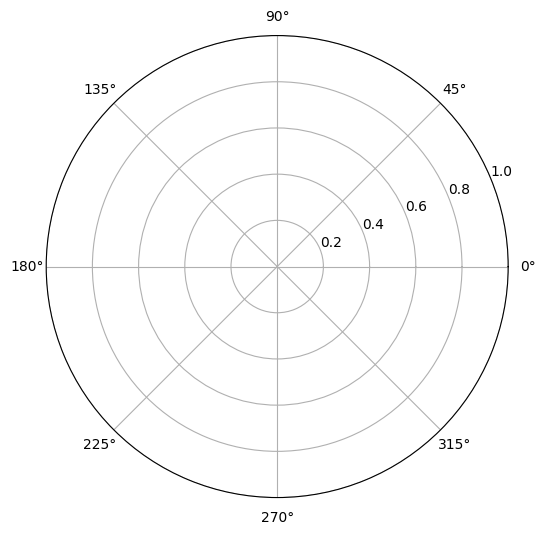

In [49]:
# This requires modification based on specific features
# Assuming 'df' has multiple features and 'X' is already scaled
def plot_star_glyphs(data, features):
    from matplotlib.patches import RegularPolygon
    num_vars = len(features)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for record in data:
        values = df[features].iloc[record].values
        values = np.concatenate((values, [values[0]]))
        angles += angles[:1]
        ax.fill(angles, values, color='red', alpha=0.25)

plot_star_glyphs(transformed_data, X.columns)